In [1]:
import os
import sys
import subprocess

in_colab = 'google.colab' in sys.modules
if in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    path = "/content/drive/MyDrive/Shared/tide_prediction_luiscorreia/tide_prediction_luiscorreia"
    os.chdir(path)
    subprocess.check_call([sys.executable, "-m", "pip", "install", "hvplot"])

Mounted at /content/drive


In [4]:
import json
# Open the JSON file for reading
with open('data/processed/amplitudes.json', 'r') as fname:
    # Load the contents from the file, which creates a Python dictionary
    amp = json.load(fname)

In [10]:
import numpy as np
from datetime import datetime, timedelta

tref = np.datetime64("1960-01-01")
parser = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')

tide_constituents = {
    "M2": 12.4206012,
    "S2": 12,
    "N2": 12.65834751,
    "K1": 23.93447213,
    "O1": 25.81933871,
    "M4": 6.210300601,
    "M6": 4.140200401,
    "MK3": 8.177140247,
    "S4": 6,
    "MN4": 6.269173724
}

def estimate_tide(t, *amplitudes, tide_constituents = tide_constituents):
    a, b = np.array_split(amplitudes, 2)
    h = t * 0
    for k, ai, bi in zip(tide_constituents, a, b):
        w = 2 * np.pi / tide_constituents[k]
        h = h + ai * np.cos(w * t) + bi * np.sin(w * t)
    return h

In [64]:
import pandas as pd

utc = "27/10/2002 12:00"

dt0 = parser(utc) - timedelta(hours = 3)

dt = pd.date_range(
    start = dt0 - timedelta(days = 12),
    end = dt0 + timedelta(days = 12),
    freq = "1H",
)
dt = (dt - tref) / np.timedelta64(1, "h")
dt0h = (np.datetime64(dt0) - tref) / np.timedelta64(1, "h")

hdt0 = estimate_tide(dt0h, *[amp[k] for k in tide_constituents])
hdt = estimate_tide(dt, *[amp[k] for k in tide_constituents])

dt = dt - dt0h

Text(0.5, 1.0, '27/10/2002 12:00 | -88.0 cm')

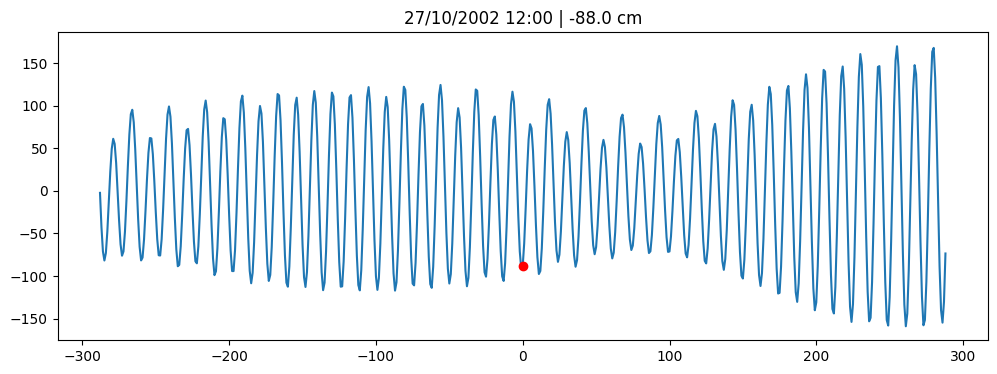

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(dt, hdt)
ax.scatter(0, hdt0, color = "red", zorder = 2)
ax.set_title(f"{utc} | {hdt0:.1f} cm")

-88.04730125760675

In [25]:
amp

{'M2': 104.0050536329305,
 'S2': 34.40718510865306,
 'N2': 21.859960520226775,
 'K1': 9.568293432916565,
 'O1': 8.512927609341933,
 'M4': 1.0910840261004067,
 'M6': 0.8205835550638362,
 'MK3': 0.5679815847661535,
 'S4': 0.34574933089899795,
 'MN4': 0.020333099218479266}